In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn import metrics
from keras.utils import to_categorical
#from sklearn.datasets.samples_generator import make_blobs

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

In [7]:
main_df = pd.DataFrame()


dataset = "COVID-19-geographic-disbtribution-worldwide-2020-12-14.csv"
df = pd.read_csv(dataset, error_bad_lines=False)

#Selecting features of the dataset to be used
df = df[["cases", "deaths", "continentExp", "Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", "countriesAndTerritories"]]

df.dropna(axis = 0, inplace=True)
df.head()

,cases,deaths,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,countriesAndTerritories
0,746,6,Asia,9.013779,Afghanistan
1,298,9,Asia,7.052776,Afghanistan
2,113,11,Asia,6.868768,Afghanistan
3,63,10,Asia,7.134266,Afghanistan
4,202,16,Asia,6.968658,Afghanistan


In [8]:
labelencoder = LabelEncoder()
df['countriesAndTerritories'] = labelencoder.fit_transform(df['countriesAndTerritories'])

df = df.sample(frac = 1)
dataset = df.values

# continent will be predicted, having other 4 features
X = dataset[:, [0,1,3,4]]
y = dataset[:,2]

scaler = MinMaxScaler()
scaler.fit(X)

#Using %20 of the data as test data and %80 of it as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)


Train (47216, 4) (47216,)
Test (11805, 4) (11805,)


In [9]:
#Performing KNN model
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8618382041507836


In [10]:
#Performing cross validation to evaluate the accuracy of our predict from the KNN model
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv = 5) 
print(score)
print(np.mean(score))

[0.86116053 0.86716367 0.86292782 0.85699763 0.85826838]
0.8613036062262758


In [14]:
#DBSCAN model
labels_true = y_train
#Specifying epsilon and min_samples values
model = DBSCAN(eps=3, min_samples=7)
db = model.fit(X_train)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Calculating number of clusters, outliers and completeness
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))

#X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
#plt.scatter(X[:,0], X[:,1])
#x = cases y = deaths

Estimated number of clusters: 131
Estimated number of noise points: 23987
Homogeneity: 0.064
Completeness: 0.075
V-measure: 0.069


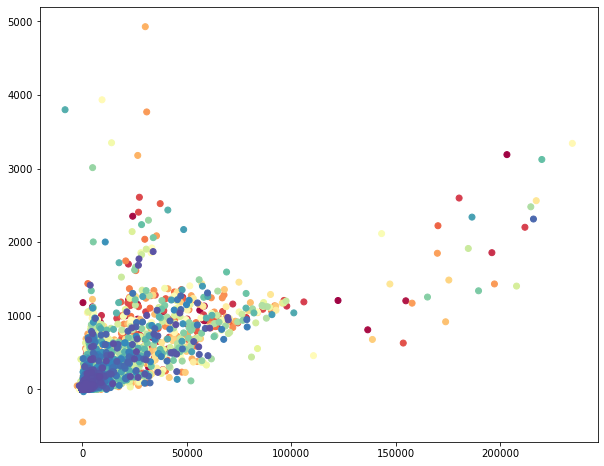

In [13]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(labels))]

plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, cmap='rainbow')
plt.show()

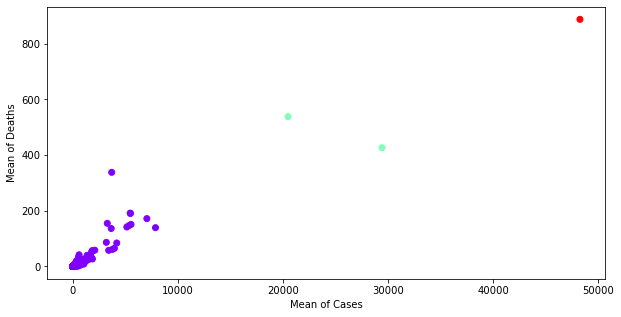

In [6]:
#Implementing Agglomerative Hierarchical Clustering based on mean of death and cases 
import scipy.cluster.hierarchy as sch

agg = df.groupby(["countriesAndTerritories"]).mean()
X = agg.values

from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

y_hc=hc.fit_predict(X)

plt.xlabel('Mean of Cases')
plt.ylabel('Mean of Deaths')
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.show()

In [9]:
#aggl = df.groupby(["countriesAndTerritories"]).mean()
#plt.plot(aggl["cases"], aggl["deaths"])
#plt.show()

In [41]:
#aggl

,cases,deaths,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
countriesAndTerritories,,,
0,49273,1971,1750.302963
1,48460,1001,21166.897880
2,92102,2596,2867.464408
3,7150,79,128373.393540
4,16180,369,688.424011
...,...,...,...
207,1397,35,19.905225
208,760,1,1827.771273
209,2082,606,99.756799
